# Discretization Invariance Analysis

This notebook explores how discretization levels influence numerical estimates in Bayesian analysis. Specifically, it compares results obtained using two wavelets:
1. **Haar (`db1`) Wavelet**
2. **Daubechies (`db8`) Wavelet**

Key Objectives:
- Analyze the impact of discretization levels (`n_range`) on mean estimates.
- Visualize the results for both wavelets side by side.
- Highlight invariance properties in Bayesian modeling.

The analysis provides insights into how the choice of discretization affects the reconstruction quality and stability.

## Importing Required Libraries

The notebook uses the following Python libraries:
- `numpy`: For numerical computations and data manipulation.
- `matplotlib`: For creating plots and visualizations.
- `seaborn`: For enhancing plot aesthetics.

These libraries enable efficient data handling and visualization for the analysis.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("..")
import seaborn as sns


sns.set_palette("Paired_r")
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
params= {'text.latex.preamble' : r'\usepackage{amsmath}'}
plt.rcParams.update(params)
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16

cm_to_in = 1/2.54

## Plotting Data

In this section:
1. Discretization levels (`n_range`) are defined: [32, 64, 128, 256, 512, 1024, 2048].
2. Samples and indices for accepted samples are loaded for both wavelets:
   - **`Discrete_Invariant_Samples_db1_n={n}`**: Samples for Haar (`db1`).
   - **`Discrete_Invariant_Samples_db8_n={n}`**: Samples for Daubechies (`db8`).
3. Mean estimates are computed for each discretization level.

### Visualization
- Two subplots are created:
  - **Left Plot**: Mean estimates for Haar (`db1`) wavelet.
  - **Right Plot**: Mean estimates for Daubechies (`db8`) wavelet.
- Legends indicate the discretization level (`n`).
- The x-axis represents the spatial domain (`x`), and the y-axis shows the numerical estimates.

The figure is saved as `Figure5.pdf`.

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


C:\Users\ahor\AppData\Local\Temp\ipykernel_14116\3741393838.py:25: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


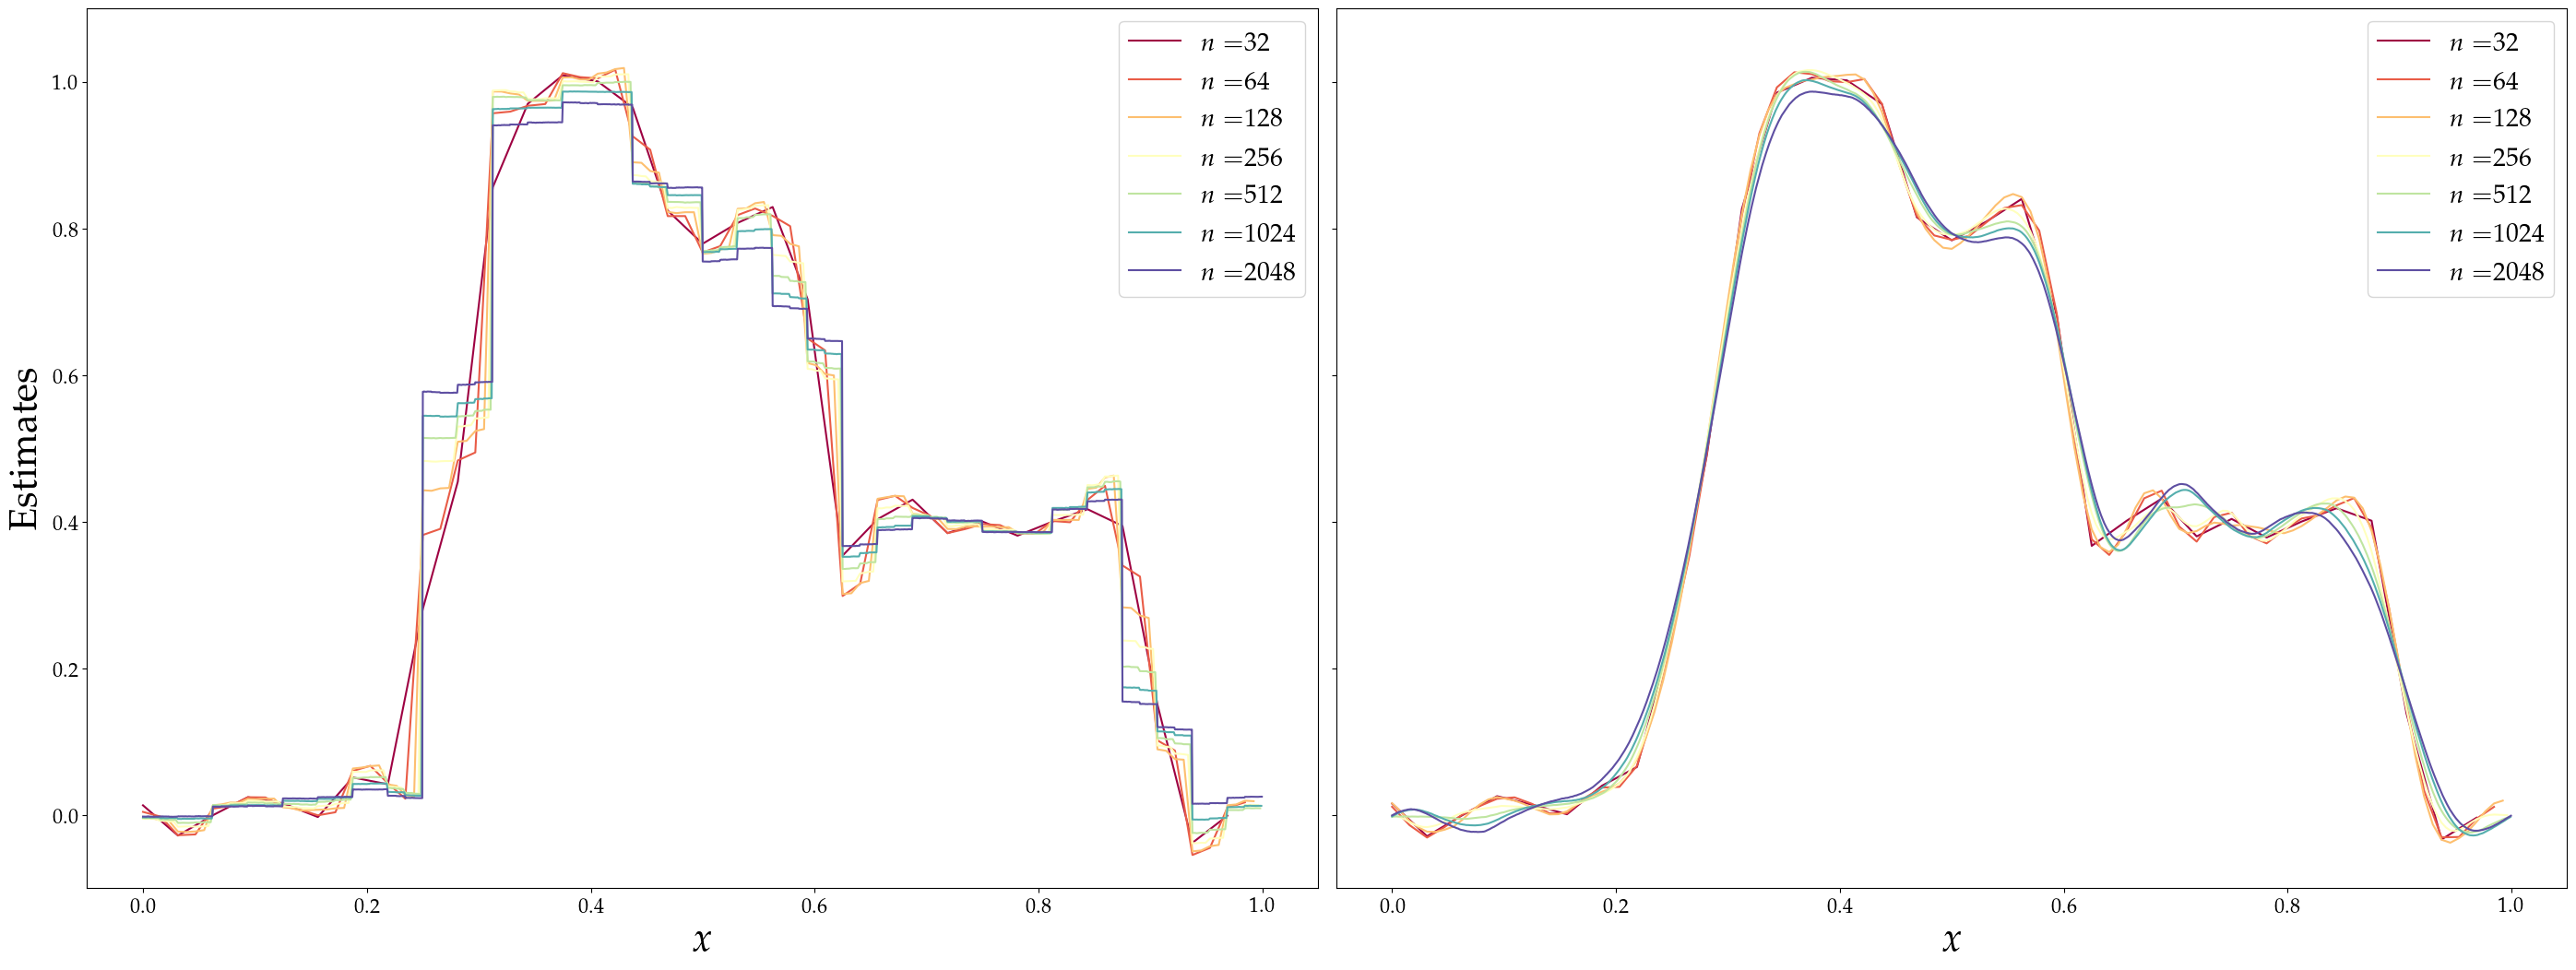

In [4]:
n_range = [32, 64, 128, 256, 512, 1024, 2048]
fig,axs = plt.subplots(1,2,sharey=True, figsize=(71.2*cm_to_in, 27.0*cm_to_in), layout="constrained")
print(plt.style.available)
plt.style.use('seaborn-v0_8-dark-palette')
axs[0].set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,7)))
axs[1].set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,7)))
for n in n_range:
        x_n = np.linspace(0, 1, n, endpoint=False)
        chain_db8=np.load("Discretization_Invariance_Plot_Data/Discrete_Invariant_Samples_db1_n=" + str(n) + " s=1.0,p=1.5" + ".npy")
        index_accept_db8=np.load("Discretization_Invariance_Plot_Data/Discrete_Invariant_index_accept_db1_n=" + str(n)+ " s=1.0,p=1.5" +  ".npy")
        chain_Haar=np.load("Discretization_Invariance_Plot_Data/Discrete_Invariant_Samples_db8_n=" + str(n) + " s=1.0,p=1.5" + ".npy")
        index_accept_Haar=np.load("Discretization_Invariance_Plot_Data/Discrete_Invariant_index_accept_db8_n=" + str(n)+ " s=1.0,p=1.5" +  ".npy")
        Mean_db8 = np.mean(chain_db8, axis=1)
        Mean_Haar = np.mean(chain_Haar, axis=1)
        axs[0].plot(x_n,Mean_Haar, label=r'$n=${}'.format(n))
        axs[1].plot(x_n,Mean_db8, label=r'$n=${}'.format(n))

axs[0].legend(fontsize=20)
axs[1].legend(fontsize=20)
axs[0].set_xlabel(r'$x$',fontsize=30)
axs[1].set_xlabel(r'$x$',fontsize=30)
axs[0].set_ylabel(r'Estimates', fontsize=30)
axs[0].set_ylim([-0.1,1.1])
axs[1].set_ylim([-0.1,1.1])
fig.tight_layout()
plt.savefig('Figure5.pdf',dpi = 300)